In [1]:
from keras import layers
from keras import models
import matplotlib.pyplot as plt
model = None

C:\Users\pekach\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os, shutil

In [3]:
original_dataset_dir = 'C:\\Users\\pekach\\keras_book\\train'
base_dir = 'C:\\Users\\pekach\\keras_book\\cats_dogs'

In [4]:
#каталоги для обучб проверб тест наборов
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')

In [5]:
#os.mkdir(train_dir)
#os.mkdir(validation_dir)
#os.mkdir(test_dir)

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))

1000
1000


In [8]:
train_cats_dir

'C:\\Users\\pekach\\keras_book\\cats_dogs\\train\\cats'

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [23]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [139]:
model.compile(loss='binary_crossentropy', \
              optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [140]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



In [141]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size = 20,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size = 20,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [142]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [143]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs =20,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/20
100/100 [==============================] - 364s 4s/step - loss: 0.0518 - acc: 0.9850 - val_loss: 0.9579 - val_acc: 0.7350
Epoch 2/20
100/100 [==============================] - 25s 248ms/step - loss: 0.0362 - acc: 0.9920 - val_loss: 1.5051 - val_acc: 0.6930
Epoch 3/20
100/100 [==============================] - 10s 103ms/step - loss: 0.0255 - acc: 0.9965 - val_loss: 1.2486 - val_acc: 0.7110
Epoch 4/20
100/100 [==============================] - 10s 103ms/step - loss: 0.0315 - acc: 0.9915 - val_loss: 1.1724 - val_acc: 0.7160
Epoch 5/20
100/100 [==============================] - 10s 104ms/step - loss: 0.0179 - acc: 0.9970 - val_loss: 1.2981 - val_acc: 0.7130
Epoch 6/20
100/100 [==============================] - 10s 102ms/step - loss: 0.0211 - acc: 0.9950 - val_loss: 1.3684 - val_acc: 0.7250
Epoch 7/20
100/100 [==============================] - 10s 102ms/step - loss: 0.0177 - acc: 0.9945 - val_loss: 1.2460 - val_acc: 0.7060
Epoch 8/20
100/100 [==============================] - 10s

KeyboardInterrupt: 

In [ ]:
#model.save('cats_and_dogs_small_1.h5')

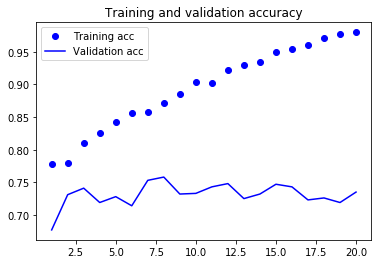

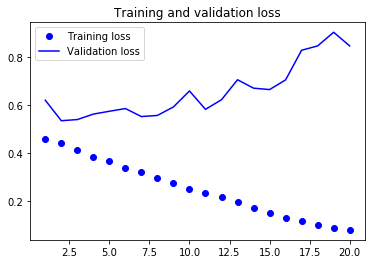

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### DATA Augmentation

In [76]:
#img=image.load_img(img_path, target_size=(150,150))
#u=image.img_to_array(img)
#u.shape

In [77]:
#u=u.reshape((1,)+u.shape)
#u.shape

In [83]:
datagen = ImageDataGenerator(
        rotation_range =90,
        width_shift_range =0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

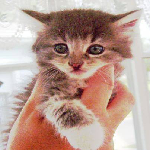

In [86]:
img=image.load_img(img_path, target_size=(150,150))
img

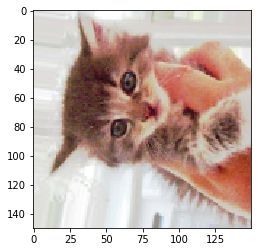

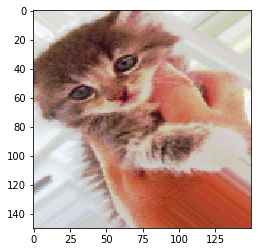

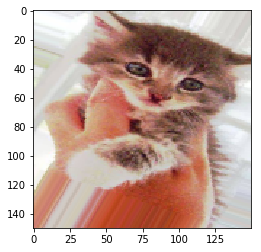

In [84]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for\
             fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img=image.load_img(img_path, target_size=(150,150))
x=image.img_to_array(img)

x=x.reshape((1,)+x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i%3==0:
        break
        
plt.show()

In [74]:
model = None
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',\
              optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [87]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range =40,
        width_shift_range =0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)


In [88]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size = 32,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size = 32,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [96]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 32s 316ms/step - loss: 0.6044 - acc: 0.6616 - val_loss: 0.5904 - val_acc: 0.6694
Epoch 2/10
100/100 [==============================] - 29s 285ms/step - loss: 0.5922 - acc: 0.6741 - val_loss: 0.5660 - val_acc: 0.6973
Epoch 3/10
100/100 [==============================] - 30s 296ms/step - loss: 0.5911 - acc: 0.6812 - val_loss: 0.5500 - val_acc: 0.7075
Epoch 4/10
100/100 [==============================] - 30s 297ms/step - loss: 0.5743 - acc: 0.7038 - val_loss: 0.5654 - val_acc: 0.7018
Epoch 5/10
100/100 [==============================] - 30s 297ms/step - loss: 0.5618 - acc: 0.7097 - val_loss: 0.5656 - val_acc: 0.6961
Epoch 6/10
100/100 [==============================] - 33s 327ms/step - loss: 0.5634 - acc: 0.7019 - val_loss: 0.5748 - val_acc: 0.6967
Epoch 7/10
100/100 [==============================] - 29s 285ms/step - loss: 0.5613 - acc: 0.7047 - val_loss: 0.5460 - val_acc: 0.7107
Epoch 8/10
100/100 [==============================] - 2

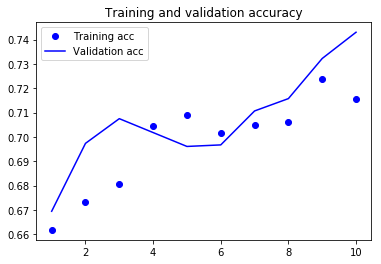

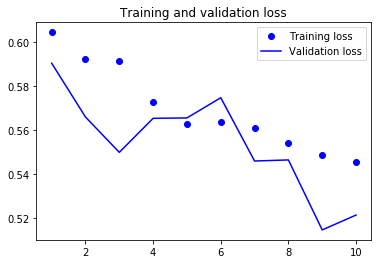

In [97]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predict

In [126]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [91]:
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [20]:
model = load_model('cats_and_dogs_small_1.h5')

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [135]:
fnames = [os.path.join(test_dogs_dir, fname) for\
             fname in os.listdir(test_dogs_dir)]

img_path = fnames[222]

img=image.load_img(img_path, target_size=(150,150))

x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)


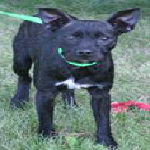

In [136]:
img

In [137]:
classes = model.predict_proba(x,verbose=1)

1/1 [==============================] - 0s 5ms/step


In [138]:
classes

array([[1.]], dtype=float32)